**This part reads dataset which has more than 5000 images for training and more than 600 images for testing.**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

x_train = list()
x_test = list()
y_train= list()
y_test = list()

for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'):
    
    for filename in filenames:
        
        path_im = os.path.join(dirname, filename)
        image2 = cv2.imread(path_im)
        img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        a = cv2.resize(img_gray, (250, 250))
        x_train.append(a)
        y_train.append(0)
        
        
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'):
    
    for filename in filenames:
        
        path_im = os.path.join(dirname, filename)
        image2 = cv2.imread(path_im)
        img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        a = cv2.resize(img_gray, (250, 250))
        x_train.append(a)
        y_train.append(1)
        
            
            
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL'):    
    for filename in filenames:
        
        path_im = os.path.join(dirname, filename)
        image2 = cv2.imread(path_im)
        img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        a = cv2.resize(img_gray, (250, 250))
        x_test.append(a)
        y_test.append(0)
        
        
for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA'):
    
    for filename in filenames:
        
        path_im = os.path.join(dirname, filename)
        image2 = cv2.imread(path_im)
        img_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        a = cv2.resize(img_gray, (250, 250))
        x_test.append(a)
        y_test.append(1)

        

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**CHANGE LISTS TO NUMPY**


(5216, 250, 250)
(624, 250, 250)
(5216,)
(624,)


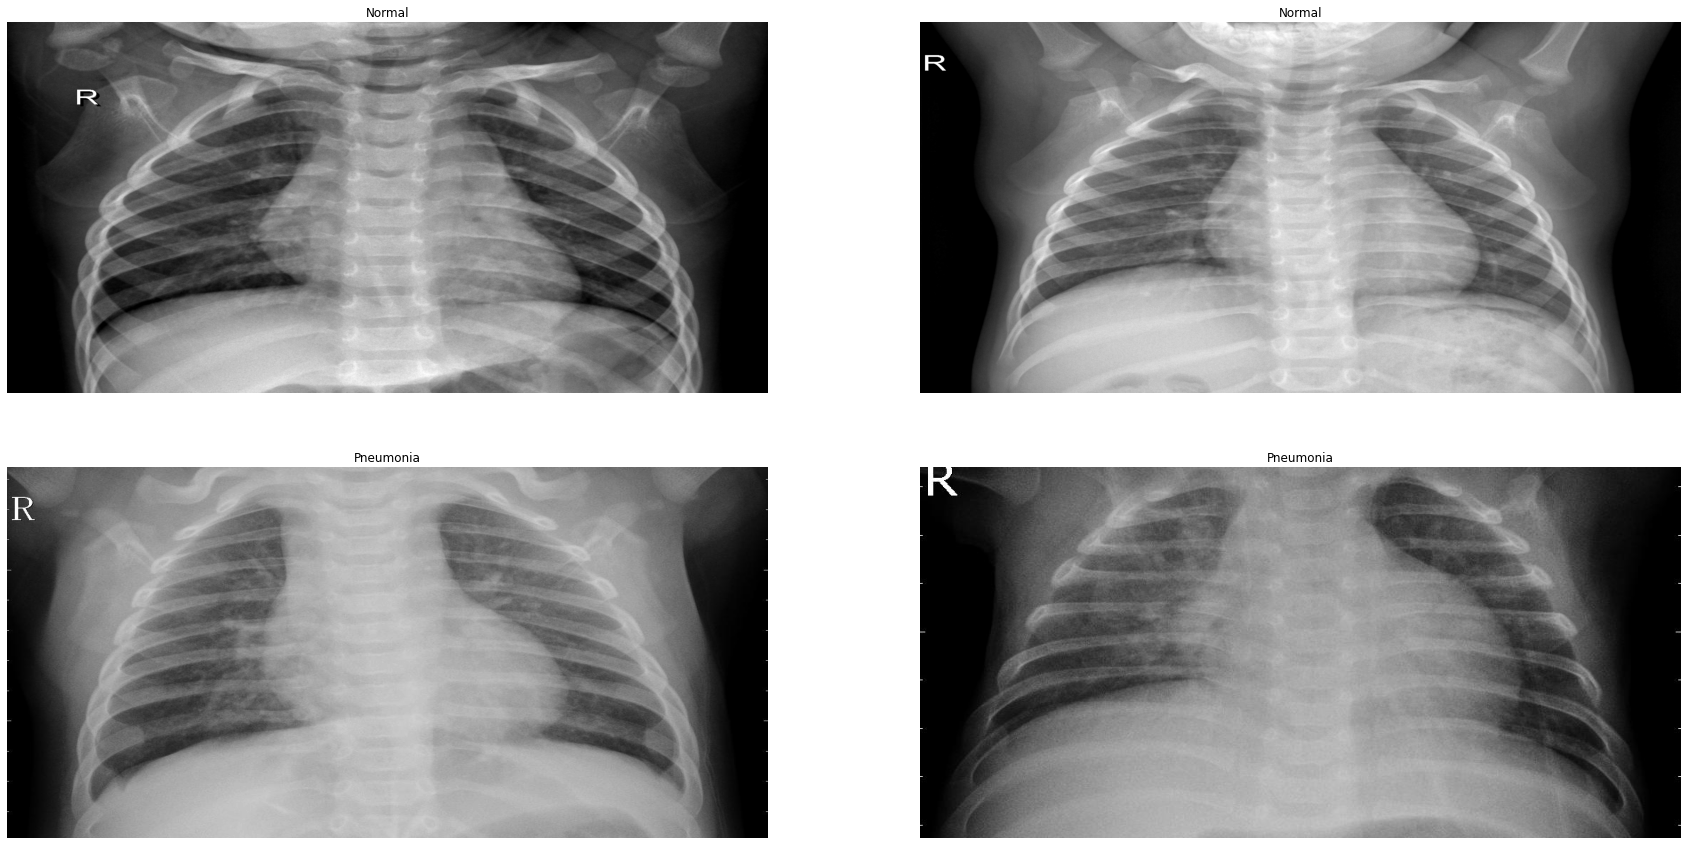

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
X_train = np.array(x_train)
X_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

samples = list()
samples = ["../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg",
                 "../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0119-0001.jpeg",
                 "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg",
                 "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1004_virus_1686.jpeg"]
f, ax = plt.subplots(2,2, figsize=(30,15))
for i in range(4):
    
    img = imread(samples[i])
    ax[i//2, i%2].imshow(img, cmap='gray')
    if i<2:
        ax[i//2, i%2].set_title("Normal")
    else:
        ax[i//2, i%2].set_title("Pneumonia")
    ax[i//2, i%2].axis('off')
    ax[i//2, i%2].set_aspect('auto')
plt.show()

In [5]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

in_shape = x_train.shape[1:]
n_classes = len(np.unique(y_train))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape, x_test.shape)

(5216, 250, 250, 1) (624, 250, 250, 1)


**BUILD NEURAL NETWORK**

In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(63, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))


model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(SeparableConv2D(64, (3,3), activation='relu', padding='same'))
model.add(SeparableConv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.7))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

COMPILE, FIT, AND EVAULATE part

Accuracy has to be more than 0.7.

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


print("Accuracy is evaluating...")
model.fit(x_train, y_train, epochs=20, batch_size=125, verbose=0)


loss, acc = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy: %.3f' % acc)


Accuracy is evaluating...
Accuracy: 0.720


In [ ]:
model.summary()